In [91]:
import pandas as pd
import numpy as np

from scipy.stats import spearmanr, rankdata
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import os
import shutil
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [95]:
df_main = pd.read_csv('F:\\Academic\\Research\\alpha\\data_primary\\mRNA_bulk.csv')
df_main = df_main.drop('Unnamed: 0',axis=1)

df_main

,gene_name,F18.MAA000377.3_9_M.1.1,J20.MAA000377.3_9_M.1.1,F19.MAA000377.3_9_M.1.1,J21.MAA000377.3_9_M.1.1,F20.MAA000377.3_9_M.1.1,J22.MAA000377.3_9_M.1.1,G11.MAA000377.3_9_M.1.1,K9.MAA000377.3_9_M.1.1,G13.MAA000377.3_9_M.1.1,...,A2.MAA100042.3_9_M.1.1,C4.MAA100042.3_9_M.1.1,A5.MAA100042.3_9_M.1.1,C6.MAA100042.3_9_M.1.1,A6.MAA100042.3_9_M.1.1,C7.MAA100042.3_9_M.1.1,A9.MAA100042.3_9_M.1.1,C9.MAA100042.3_9_M.1.1,A10.MAA100042.3_9_M.1.1,C10.MAA100042.3_9_M.1.1
0,0610005C13Rik,0,0,0,0,0,0,0,0,168,...,0,99,0,292,0,310,392,220,0,0
1,0610007C21Rik,0,0,0,0,2,58,1,0,0,...,0,753,0,630,1,768,527,129,0,0
2,0610007L01Rik,23,0,0,0,0,0,1,5,0,...,0,0,0,35,0,90,0,23,0,0
3,0610007N19Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0610007P08Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15510,Zyg11b,0,46,0,0,0,0,38,0,0,...,0,0,0,0,1,34,0,11,0,0
15511,Zyx,277,202,0,3,0,3,0,24,0,...,0,285,0,0,27,0,0,0,0,0
15512,Zzef1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,98,0,0,0,0
15513,Zzz3,0,191,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df = df_main.iloc[:,1:].to_numpy()
df = np.transpose(df)

df.shape

(981, 15515)

In [96]:
sc = StandardScaler()
 
# df = sc.fit_transform(df)

(981, 15515)

In [21]:
def generate_feature_distance_ranking(data, method='Pearson'):
    '''
    This function generates ranking of distances/dissimilarities between features for tabular data.
    Input:
    data: input data, n_sample by n_feature
    method: 'Pearson' uses Pearson correlation coefficient to evaluate similarity between features;
        'Spearman' uses Spearman correlation coefficient to evaluate similarity between features;
        'set' uses Jaccard index to evaluate similarity between features that are binary variables.
    Return:
    ranking: symmetric ranking matrix based on dissimilarity
    corr: matrix of distances between features
    '''

    num = data.shape[1]
    if method == 'Pearson':
        corr = np.corrcoef(np.transpose(data))
    elif method == 'Spearman':
        corr = spearmanr(data).correlation
    elif method == 'Euclidean':
        corr = squareform(pdist(np.transpose(data), metric='euclidean'))
        corr = np.max(corr) - corr
        corr = corr / np.max(corr)
    elif method == 'set':  # This is the new set operation to calculate similarity. It does not tolerate all-zero features.
        corr1 = np.dot(np.transpose(data), data)
        corr2 = data.shape[0] - np.dot(np.transpose(1 - data), 1 - data)
        corr = corr1 / corr2

    corr = 1 - corr
    corr = np.around(a=corr, decimals=10)

    tril_id = np.tril_indices(num, k=-1)
    rank = rankdata(corr[tril_id])
    ranking = np.zeros((num, num))
    ranking[tril_id] = rank
    ranking = ranking + np.transpose(ranking)

    return ranking, corr

In [102]:
num = df.shape[1]
corr = np.corrcoef(np.transpose(df))
corr = 1 - corr
corr = np.around(a=corr, decimals=10)
tril_id = np.tril_indices(num)
rank = rankdata(corr[tril_id])


In [82]:
ranking = np.zeros((num, num))

In [85]:
ranking.shape

(981, 981)

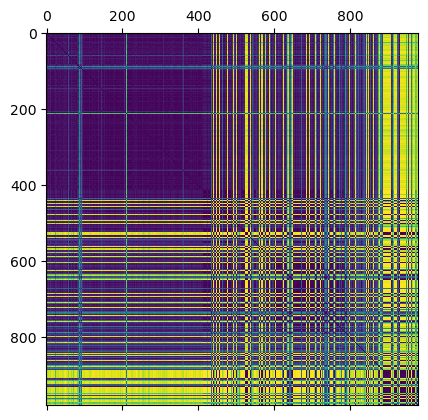

In [38]:
plt.matshow(corr)
plt.show()

In [86]:
df.shape[1]

981

In [67]:
tril_id[1]

array([  0,   0,   1, ..., 979, 980, 981])